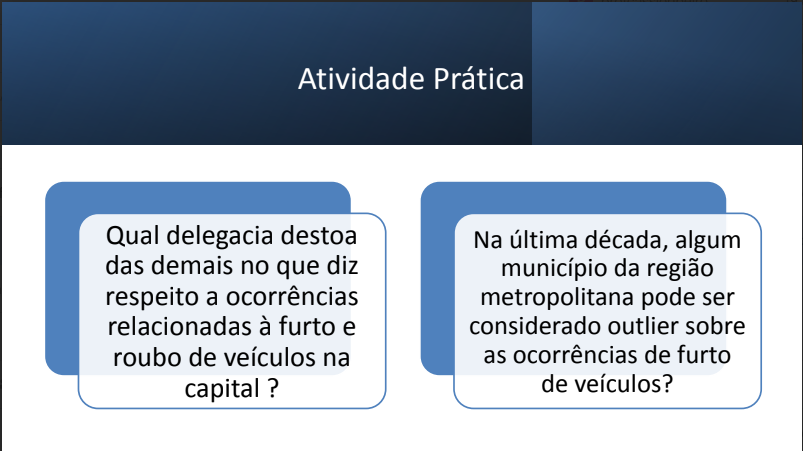

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
base_dados = pd.read_csv("BaseDPEvolucaoMensalCisp.csv",sep = ";", encoding="latin1")
print(base_dados.columns)

In [ ]:
dados_capital = base_dados[base_dados["regiao"] == "Capital"]
dados_capital.head()

In [6]:
ocorrencias_delegacia = dados_capital.groupby("cisp")[["furto_veiculos", "roubo_veiculo"]].sum()
ocorrencias_delegacia["Total"] = ocorrencias_delegacia["furto_veiculos"] + ocorrencias_delegacia["roubo_veiculo"]

In [7]:
furtos = ocorrencias_delegacia.sort_values("furto_veiculos", ascending=False).head(5)
roubos = ocorrencias_delegacia.sort_values("roubo_veiculo", ascending=False).head(5)
total_rj = ocorrencias_delegacia.sort_values("Total", ascending=False).head(5)

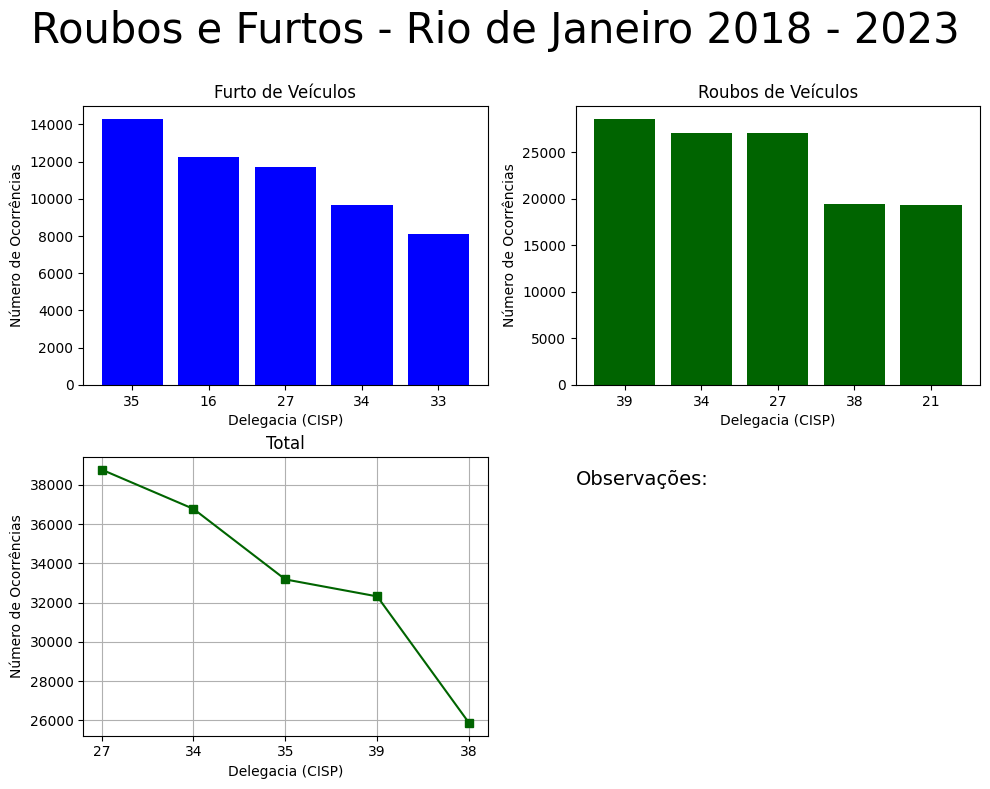

In [11]:
fig , axs = plt.subplots(2,2,figsize=(10,8))

# Gráfico Furtos de Veículos
axs[0,0].bar(furtos.index.astype(str), furtos["furto_veiculos"], color="blue")
axs[0,0].set_title("Furto de Veículos")
axs[0,0].set_ylabel("Número de Ocorrências")
axs[0,0].set_xlabel("Delegacia (CISP)")

# Gráfico Roubo de Veículos
axs[0,1].bar(roubos.index.astype(str), roubos["roubo_veiculo"], color="darkgreen")
axs[0,1].set_title("Roubos de Veículos")
axs[0,1].set_ylabel("Número de Ocorrências")
axs[0,1].set_xlabel("Delegacia (CISP)")

# Gráfico Total de Roubos e Furtos de Veículos
axs[1,0].plot(total_rj.index.astype(str),total_rj["Total"], marker = "s",color="darkgreen")
axs[1,0].set_title("Total")
axs[1,0].set_ylabel("Número de Ocorrências")
axs[1,0].set_xlabel("Delegacia (CISP)")
axs[1,0].grid(True)

axs[1,1].axis("off")
axs[1,1].text(0, 0.9, "Observações:", fontsize=14)


fig.tight_layout()
fig.suptitle("Roubos e Furtos - Rio de Janeiro 2018 - 2023", fontsize=30)
fig.subplots_adjust(top=0.86)